In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings("ignore")

In [32]:
import os
os.makedirs('plots', exist_ok=True)

In [33]:
df = pd.read_csv(r"C:\Users\Casper Ruta\Desktop\csj-results-cleaned.csv")
df.head(10)

,Constituency,Total_Amount_Paid,Total_Jobs_Created,Cost Per Job
0,Ville-Marie - Le Sud-Ouest - Île-des-Soeurs,"1,913,923",414,"4,623.00"
1,Long Range Mountains,"1,807,700",448,"4,035.04"
2,Coast of Bays - Central - Notre Dame,"1,676,188",420,"3,990.92"
3,London-Centre-Nord,"1,626,934",360,"4,519.26"
4,Bonavista - Burin - Trinity,"1,566,115",372,"4,209.99"
5,Ottawa-Sud,"1,535,622",370,"4,150.33"
6,Mississauga - Erin Mills,"1,516,853",341,"4,448.25"
7,Ottawa-Centre,"1,495,592",329,"4,545.87"
8,St. John's-Sud - Mount Pearl,"1,494,810",371,"4,029.14"
9,Calgary Confederation,"1,467,792",417,"3,519.88"


In [34]:
df['Cost Per Job'] = df['Cost Per Job'].replace('[\$,]', '', regex=True).astype(float)
df['Total_Amount_Paid'] = df['Total_Amount_Paid'].replace('[\$,]', '', regex=True).astype(float)
df['Total_Amount_Paid'] = df['Total_Amount_Paid'].replace('[\$,]', '', regex=True).astype(float)

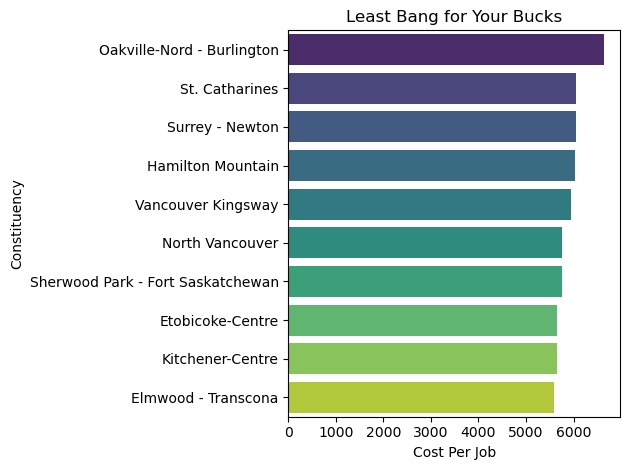

In [35]:
top10 = df.nlargest(10,'Cost Per Job')
sns.barplot(data=top10, x='Cost Per Job', y='Constituency', palette='viridis') 
plt.title('Least Bang for Your Bucks')
plt.tight_layout()
plt.savefig('fig2.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()  

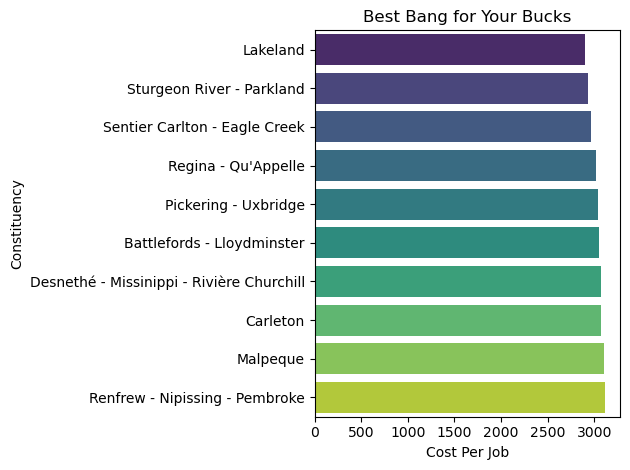

In [36]:
bottom10 = df.nsmallest(10, 'Cost Per Job')
sns.barplot(data=bottom10, x='Cost Per Job', y='Constituency', palette='viridis')
plt.title('Best Bang for Your Bucks')
plt.tight_layout()
plt.savefig('fig3.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

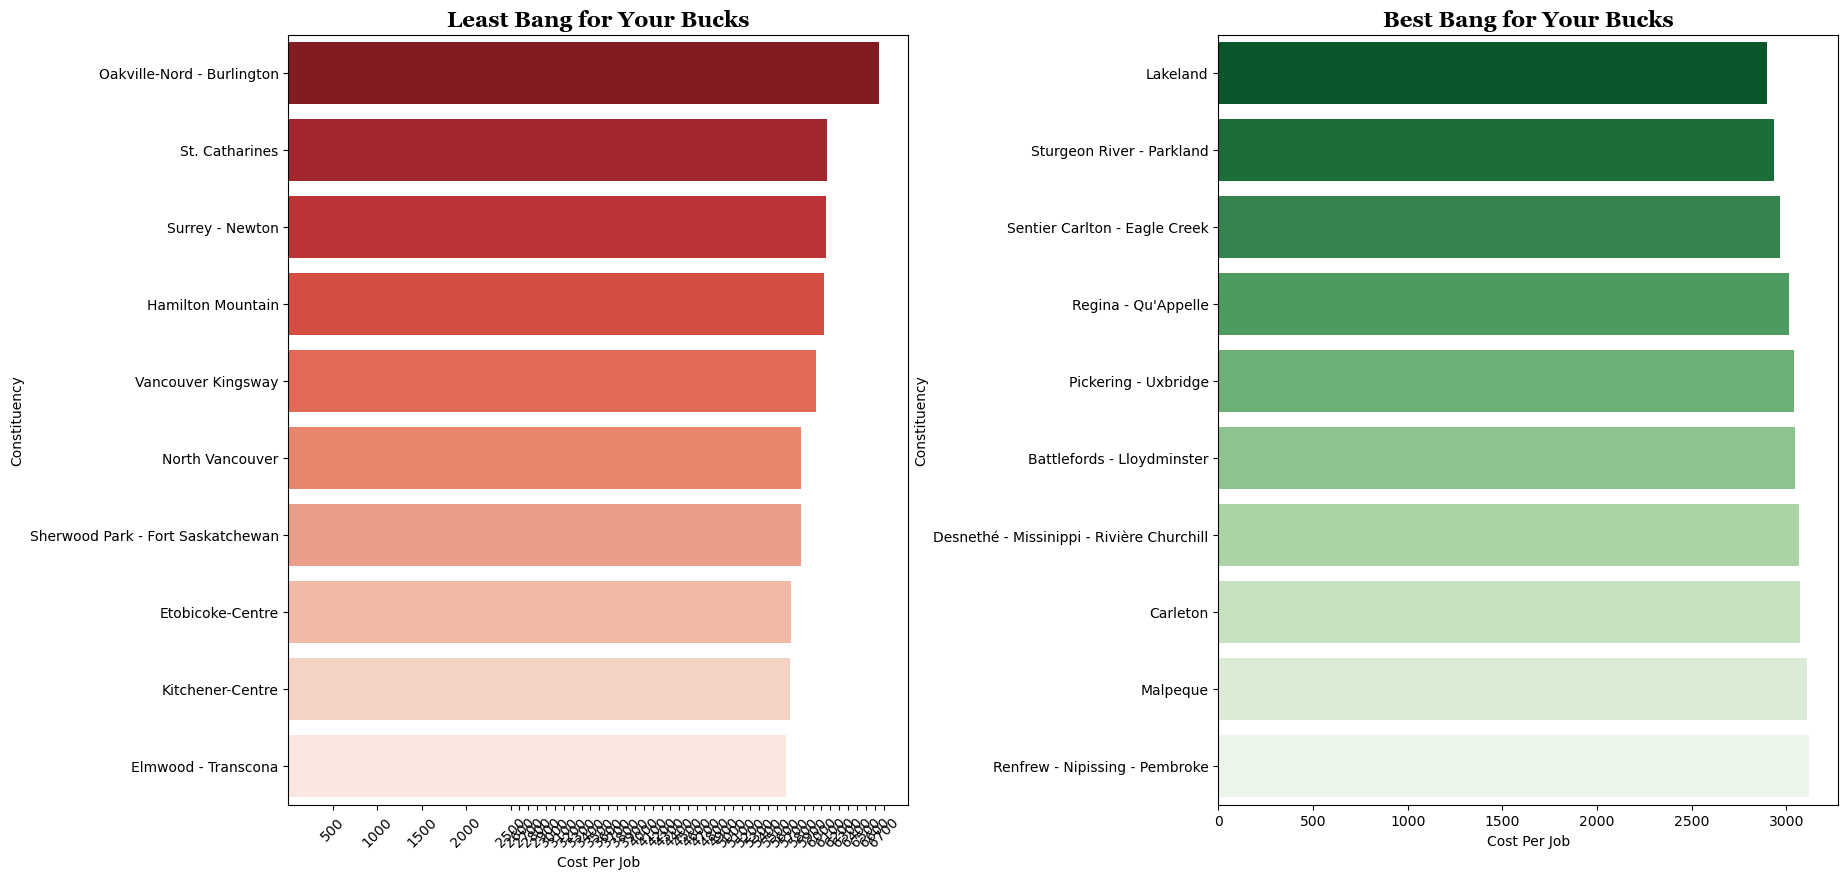

In [37]:
# 1. Create the figure and axes FIRST
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# 2. Plot your data
top10 = df.nlargest(10, 'Cost Per Job')
sns.barplot(data=top10, x='Cost Per Job', y='Constituency', palette='Reds_r', ax=ax1)
ax1.set_title('Least Bang for Your Bucks', fontname='Georgia', fontsize=16, fontweight='bold')

bottom10 = df.nsmallest(10, 'Cost Per Job')
sns.barplot(data=bottom10, x='Cost Per Job', y='Constituency', palette='Greens_r', ax=ax2)
ax2.set_title('Best Bang for Your Bucks', fontname='Georgia', fontsize=16, fontweight='bold')

# 3. THEN customize the ticks
custom_ticks = [500, 1000, 1500, 2000, 2500, 2600, 2700, 2800, 2900, 3000]
max_val = top10['Cost Per Job'].max()
extra_ticks = list(range(3100, int(max_val) + 100, 100))
all_ticks = custom_ticks + extra_ticks
ax1.set_xticks(all_ticks)
ax1.tick_params(axis='x', rotation=45)

plt.subplots_adjust(wspace=0.5)
plt.savefig('fig4.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

In [38]:
# Filter all Edmonton constituencies
edmonton = df[df['Constituency'].str.contains('Edmonton', case=False)]

print(edmonton)
    

              Constituency  Total_Amount_Paid  Total_Jobs_Created  \
16     Edmonton Strathcona          1347890.0                 356   
32      Edmonton Griesbach          1220079.0                 279   
38         Edmonton-Centre          1199333.0                 252   
122    Edmonton Mill Woods           922450.0                 220   
138  St. Albert - Edmonton           905608.0                 257   
156     Edmonton Riverbend           871108.0                 229   
157  Edmonton - Wetaskiwin           868800.0                 256   
161         Edmonton-Ouest           860108.0                 201   
278       Edmonton Manning           609550.0                 189   

     Cost Per Job  
16        3786.21  
32        4373.04  
38        4759.26  
122       4192.95  
138       3523.77  
156       3803.97  
157       3393.75  
161       4279.14  
278       3225.13  


In [39]:
## Calculating the Totals for Edmonton & Compare it to Calgary 
edmonton = df[df['Constituency'].str.contains('Edmonton', case=False)]
calgary = df[df['Constituency'].str.contains('Calgary', case=False)]

# Calculate totals for each city
cities_comparison = pd.DataFrame({
    'City': ['Edmonton', 'Calgary'],
    'Total_Amount_Paid': [edmonton['Total_Amount_Paid'].sum(), calgary['Total_Amount_Paid'].sum()],
    'Total_Jobs_Created': [edmonton['Total_Jobs_Created'].sum(), calgary['Total_Jobs_Created'].sum()]
})
cities_comparison['Cost Per Job'] = cities_comparison['Total_Amount_Paid'] / cities_comparison['Total_Jobs_Created']

print(cities_comparison)


       City  Total_Amount_Paid  Total_Jobs_Created  Cost Per Job
0  Edmonton          8804926.0                2239   3932.526128
1   Calgary         10309459.0                2711   3802.825157


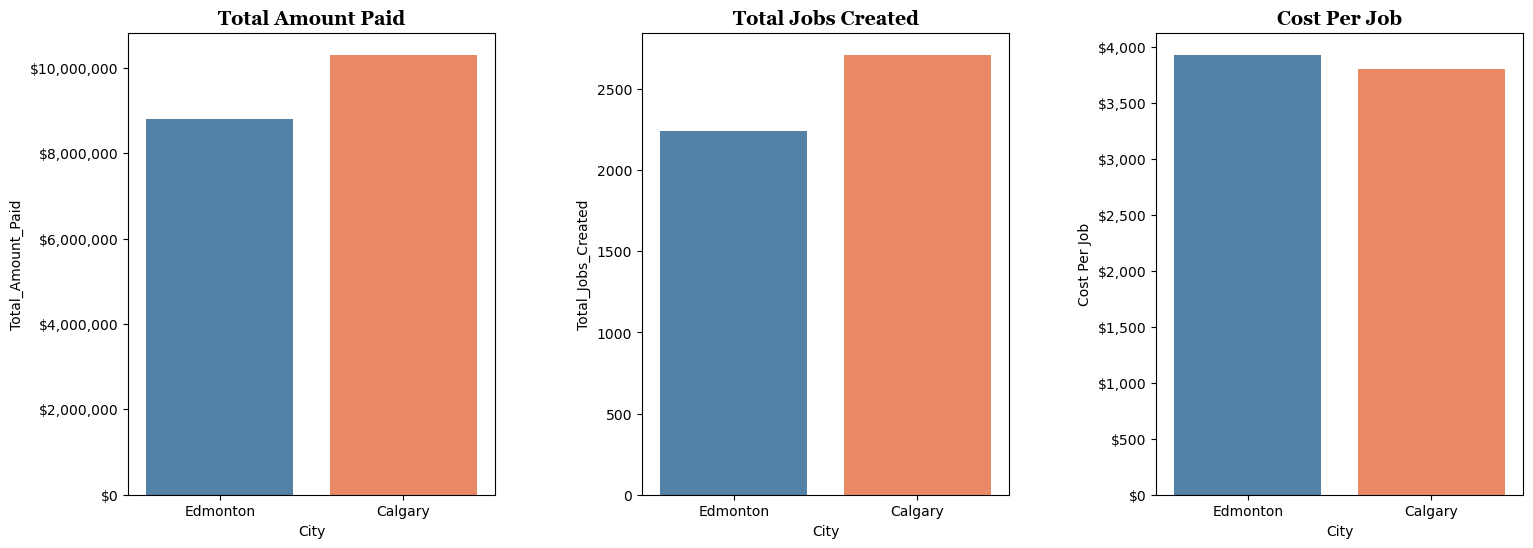

In [40]:
from matplotlib.ticker import FuncFormatter

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.patch.set_alpha(0)

# Chart 1 — Total Amount Paid
sns.barplot(data=cities_comparison, x='City', y='Total_Amount_Paid', palette=['steelblue', 'coral'], ax=ax1)
ax1.set_title('Total Amount Paid', fontname='Georgia', fontsize=14, fontweight='bold')
ax1.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax1.patch.set_alpha(0)

# Chart 2 — Total Jobs Created
sns.barplot(data=cities_comparison, x='City', y='Total_Jobs_Created', palette=['steelblue', 'coral'], ax=ax2)
ax2.set_title('Total Jobs Created', fontname='Georgia', fontsize=14, fontweight='bold')
ax2.patch.set_alpha(0)

# Chart 3 — Cost Per Job
sns.barplot(data=cities_comparison, x='City', y='Cost Per Job', palette=['steelblue', 'coral'], ax=ax3)
ax3.set_title('Cost Per Job', fontname='Georgia', fontsize=14, fontweight='bold')
ax3.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
ax3.patch.set_alpha(0)

plt.subplots_adjust(wspace=0.4)
plt.savefig('fig5.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()

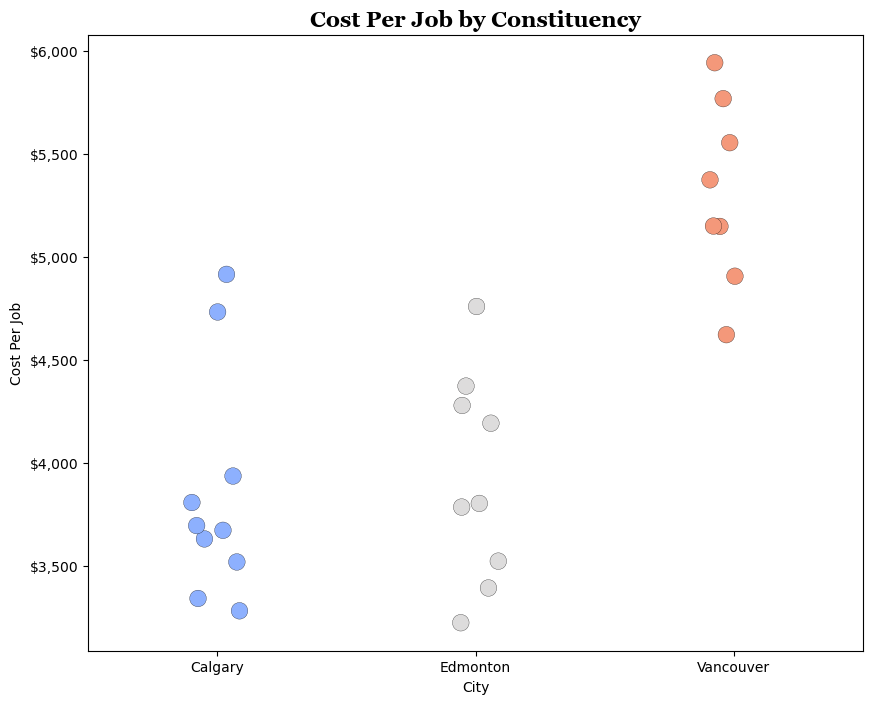

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Filter the three cities
df_filtered = df[df['Constituency'].str.contains('Calgary|Vancouver|Edmonton', case=False)].copy()

# Add City column
df_filtered['City'] = df_filtered['Constituency'].apply(
    lambda x: 'Calgary' if 'calgary' in x.lower()
         else 'Vancouver' if 'vancouver' in x.lower()
         else 'Edmonton'
)

# Scatterplot
fig, ax = plt.subplots(figsize=(10, 8))
sns.stripplot(data=df_filtered, x='City', y='Cost Per Job',
              palette='coolwarm', s=12, edgecolor='black',
              linewidth=0.2, jitter=True, ax=ax)

ax.set_title('Cost Per Job by Constituency', fontname='Georgia', fontsize=16, fontweight='bold')
ax.set_ylabel('Cost Per Job')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'${x:,.0f}'))
fig.patch.set_alpha(0)
ax.patch.set_alpha(0)
plt.savefig('fig1.png', dpi=150, bbox_inches='tight', facecolor='white')
plt.show()